<a href="https://colab.research.google.com/github/KaluLIS/COMPLEXITY/blob/main/R_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Month Unemployment
1    Jan          6.9
2    Feb          6.7
3    Mar          6.6
4    Apr          6.5
5    May          7.3
6    Jun          6.2
7    Jul          7.0
8    Aug          6.9
9   Sept          6.7
10   Oct          6.6
11   Nov          6.5
12   Dec          6.4
[1] 6.5
[1] "Jun" "Dec"


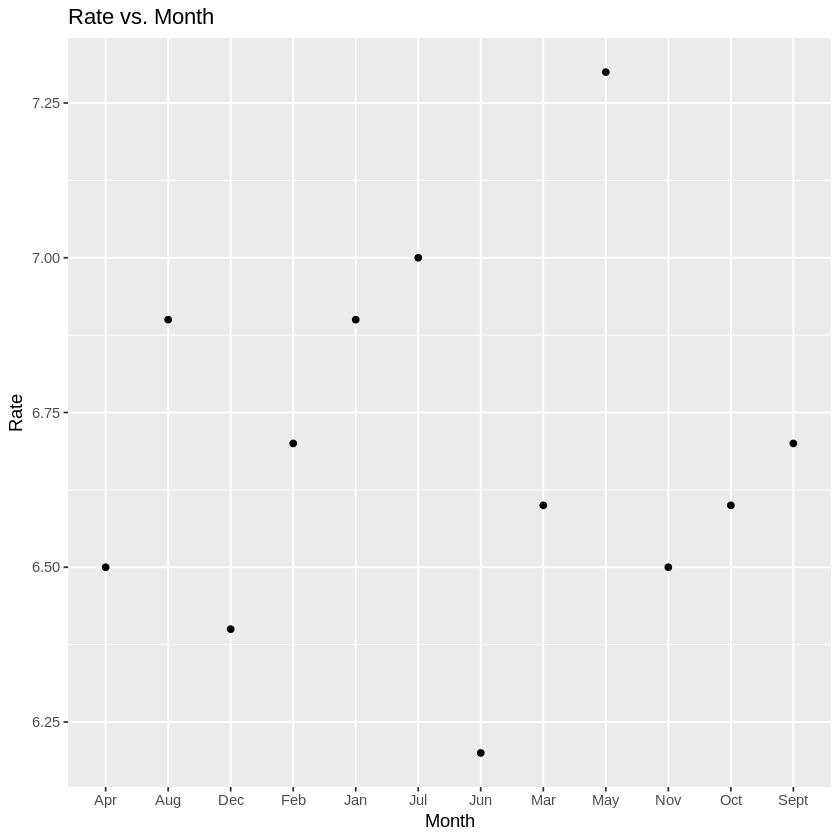

In [ ]:
#install.packages("ggplot2")
library(ggplot2)

rate<-c(6.9, 6.7, 6.6, 6.5, 7.3, 6.2, 7.0, 6.9, 6.7, 6.6, 6.5, 6.4)
month <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
		"Sept", "Oct", "Nov", "Dec")

monthly_rate<-data.frame(Month=month,Unemployment=rate)
print(monthly_rate)

#Inside the square bracket mention the column name and access March.
# After accessing March obtain corresponding value

unemp_March<-monthly_rate$Unemployment[monthly_rate$Month=="Apr"]
print(unemp_March)

name<-monthly_rate$Month[monthly_rate$Unemployment<6.5]
print(name)

# Scatter plot
ggplot(monthly_rate, aes(x = Month, y = Unemployment)) +
geom_point() +
labs(x = "Month", y = "Rate") +
ggtitle("Rate vs. Month")


In [ ]:
library(foreign) # Importing Stata datasets
library(ggplot2) # Graphs
library(lme4) # Estimating multilevel models
library(lmerTest) # Printing p-values for the regression coefficients
library(lmtest) # Conducting likelihood ratio tests

ERROR: Error in library(lmerTest): there is no package called ‘lmerTest’


In [ ]:
mydata <- read.dta("tutorial.dta")

In [ ]:
head(mydata)

,school,student,normexam,cons,standlrt,girl,schgend,avslrt,schav,vrband
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,0.2613245,1,0.6190593,1,mixedsch,0.1661745,mid,vb1
2,1,2,0.1340668,1,0.2058020,1,mixedsch,0.1661745,mid,vb2
3,1,3,-1.7238824,1,-1.3645757,0,mixedsch,0.1661745,mid,vb3
4,1,4,0.9675860,1,0.2058020,1,mixedsch,0.1661745,mid,vb2
5,1,5,0.5443409,1,0.3711049,1,mixedsch,0.1661745,mid,vb2
6,1,6,1.7348992,1,2.1894369,0,mixedsch,0.1661745,mid,vb1


In [ ]:
str(mydata)

'data.frame':	4059 obs. of  10 variables:
 $ school  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ student : int  1 2 3 4 5 6 7 8 9 10 ...
 $ normexam: num  0.261 0.134 -1.724 0.968 0.544 ...
 $ cons    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ standlrt: num  0.619 0.206 -1.365 0.206 0.371 ...
 $ girl    : int  1 1 0 1 1 0 0 0 1 0 ...
 $ schgend : Factor w/ 3 levels "mixedsch","boysch",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avslrt  : num  0.166 0.166 0.166 0.166 0.166 ...
 $ schav   : Factor w/ 3 levels "low","mid","high": 2 2 2 2 2 2 2 2 2 2 ...
 $ vrband  : Factor w/ 3 levels "vb1","vb2","vb3": 1 2 3 2 2 1 3 2 2 3 ...
 - attr(*, "datalabel")= chr "School examination scores data"
 - attr(*, "time.stamp")= chr "28 Apr 2014 17:37"
 - attr(*, "formats")= chr [1:10] "%9.0g" "%9.0g" "%3.2f" "%9.0g" ...
 - attr(*, "types")= int [1:10] 251 252 254 251 254 251 251 254 251 251
 - attr(*, "val.labels")= chr [1:10] "" "" "" "" ...
 - attr(*, "var.labels")= chr [1:10] "School ID" "Student ID" "Age 16 exam score (normalised)

In [ ]:
length(unique(mydata$school))

[1] 65

In [ ]:
table(mydata$girl)


   0    1 
1623 2436 

In [ ]:
summary(mydata)


     school         student         normexam              cons  
 Min.   : 1.00   Min.   :  1.0   Min.   :-3.666072   Min.   :1  
 1st Qu.:14.00   1st Qu.: 16.0   1st Qu.:-0.699505   1st Qu.:1  
 Median :29.00   Median : 33.0   Median : 0.004322   Median :1  
 Mean   :31.01   Mean   : 38.7   Mean   :-0.000114   Mean   :1  
 3rd Qu.:47.00   3rd Qu.: 54.0   3rd Qu.: 0.678759   3rd Qu.:1  
 Max.   :65.00   Max.   :198.0   Max.   : 3.666091   Max.   :1  
    standlrt             girl            schgend         avslrt        
 Min.   :-2.93495   Min.   :0.0000   mixedsch:2169   Min.   :-0.75596  
 1st Qu.:-0.62071   1st Qu.:0.0000   boysch  : 513   1st Qu.:-0.14934  
 Median : 0.04050   Median :1.0000   girlsch :1377   Median :-0.02020  
 Mean   : 0.00181   Mean   :0.6001                   Mean   : 0.00181  
 3rd Qu.: 0.61906   3rd Qu.:1.0000                   3rd Qu.: 0.21052  
 Max.   : 3.01595   Max.   :1.0000                   Max.   : 0.63766  
  schav      vrband    
 low : 640   vb1:

In [ ]:
apply(mydata[c("normexam", "standlrt")], 2, sd)

normexam  standlrt 
0.9989439 0.9932241

In [ ]:
head(mydata[mydata$school==1,
c("school", "student", "normexam", "standlrt", "girl", "schgend")], 2)

,school,student,normexam,standlrt,girl,schgend
,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,1,1,0.2613245,0.6190593,1,mixedsch
2,1,2,0.1340668,0.2058020,1,mixedsch


In [ ]:
tail(mydata[mydata$school==1,
c("school", "student", "normexam", "standlrt", "girl", "schgend")], 1)

,school,student,normexam,standlrt,girl,schgend
,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
73,1,73,0.2613245,0.3711049,0,mixedsch


In [ ]:
head(mydata[mydata$school == 2,
c("school", "student", "normexam", "standlrt", "girl", "schgend")], 2)

,school,student,normexam,standlrt,girl,schgend
,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
74,2,1,1.579220,0.1231505,1,girlsch
75,2,2,1.240533,0.7017107,1,girlsch


In [ ]:
tail(mydata[mydata$school == 2,
c("school", "student", "normexam", "standlrt", "girl", "schgend")], 1)

,school,student,normexam,standlrt,girl,schgend
,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
128,2,55,-0.8526701,-1.116621,1,girlsch


In [ ]:
head(mydata[mydata$school == 1,], 2)

,school,student,normexam,cons,standlrt,girl,schgend,avslrt,schav,vrband
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,0.2613245,1,0.6190593,1,mixedsch,0.1661745,mid,vb1
2,1,2,0.1340668,1,0.2058020,1,mixedsch,0.1661745,mid,vb2


In [ ]:
head(mydata[mydata$school == 1,], 10)

,school,student,normexam,cons,standlrt,girl,schgend,avslrt,schav,vrband
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,0.2613245,1,0.6190593,1,mixedsch,0.1661745,mid,vb1
2,1,2,0.1340668,1,0.2058020,1,mixedsch,0.1661745,mid,vb2
3,1,3,-1.7238824,1,-1.3645757,0,mixedsch,0.1661745,mid,vb3
4,1,4,0.9675860,1,0.2058020,1,mixedsch,0.1661745,mid,vb2
5,1,5,0.5443409,1,0.3711049,1,mixedsch,0.1661745,mid,vb2
6,1,6,1.7348992,1,2.1894369,0,mixedsch,0.1661745,mid,vb1
7,1,7,1.0396080,1,-1.1166214,0,mixedsch,0.1661745,mid,vb3
8,1,8,-0.1290847,1,-1.0339699,0,mixedsch,0.1661745,mid,vb2
9,1,9,-0.9393777,1,-0.5380612,1,mixedsch,0.1661745,mid,vb2


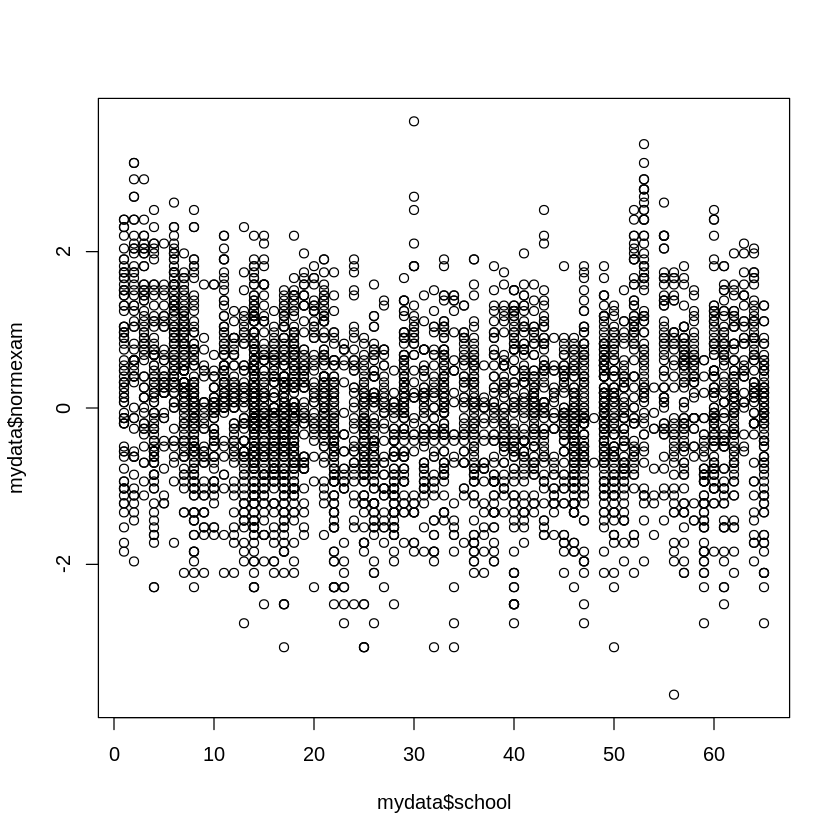

In [ ]:
plot(mydata$school, mydata$normexam)

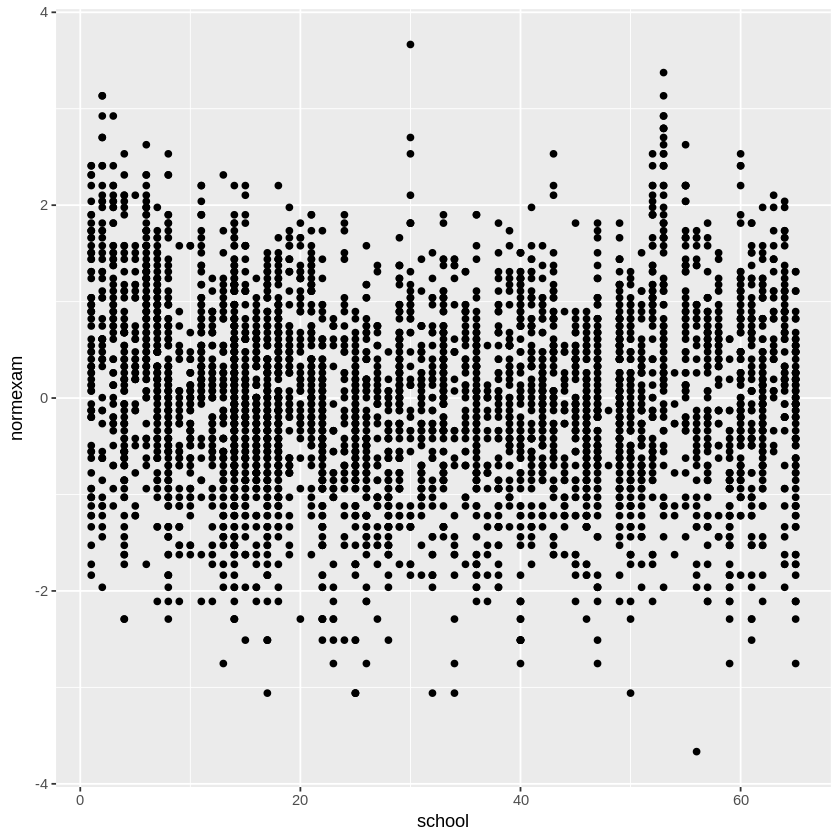

In [ ]:
ggplot(mydata, aes(x = school, y = normexam)) +
geom_point()

In [ ]:
mydata$schoolmean <- ave(mydata$normexam, mydata$school, FUN = mean,
na.rm = TRUE)

In [ ]:
m1 <- lm(normexam ~ 1, data = mydata)

In [ ]:
summary(m1)


Call:
lm(formula = normexam ~ 1, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6660 -0.6994  0.0044  0.6789  3.6662 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0001139  0.0156795  -0.007    0.994

Residual standard error: 0.9989 on 4058 degrees of freedom


In [ ]:
library(lmerTest)

ERROR: Error in library(lmerTest): there is no package called ‘lmerTest’


In [ ]:
!R -e "if (!requireNamespace('lmerTest', quietly = TRUE)) install.packages('lmerTest')"
!R -e "if (!requireNamespace('lme4', quietly = TRUE)) install.packages('lme4')"

ERROR: Error in parse(text = input): <text>:1:7: unexpected string constant
1: !R -e "if (!requireNamespace('lmerTest', quietly = TRUE)) install.packages('lmerTest')"
          ^


In [ ]:
install.packages('lmerTest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘numDeriv’




In [ ]:

# Fit Model 1
m1 <- lm(normexam ~ 1, data = mydata)
summary(m1)
sigma(m1)^2
-2*logLik(m1)



Call:
lm(formula = normexam ~ 1, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6660 -0.6994  0.0044  0.6789  3.6662 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0001139  0.0156795  -0.007    0.994

Residual standard error: 0.9989 on 4058 degrees of freedom


[1] 0.9978889

'log Lik.' 11509.36 (df=2)

In [ ]:
# Fit Model 2
m2 <- lmer(normexam ~ 1 + (1 | school), data = mydata, REML = FALSE)
summary(m2)

# Calculate the VPC/ICC for Model 2
rpm2 <- as.data.frame(VarCorr(m2))
rpm2
rpm2$vcov[rpm2$grp=="school"] / sum(rpm2$vcov)

# Perform likelihood ratio test
lrtest(m1, m2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: normexam ~ 1 + (1 | school)
   Data: mydata

     AIC      BIC   logLik deviance df.resid 
 11016.6  11035.6  -5505.3  11010.6     4056 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9471 -0.6486  0.0117  0.6992  3.6578 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.1686   0.4107  
 Residual             0.8478   0.9207  
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.01317    0.05363  -0.246

grp,var1,var2,vcov,sdcor
<chr>,<chr>,<chr>,<dbl>,<dbl>
school,(Intercept),NA,0.1686390,0.4106568
Residual,NA,NA,0.8477603,0.9207390


[1] 0.1659181

ERROR: Error in lrtest(m1, m2): could not find function "lrtest"


In [ ]:
# Fit Model 3
m3 <- lmer(normexam ~ standlrt + (1 | school), data = mydata, REML = FALSE)
summary(m3)

# Calculate the VPC/ICC for Model 3
rpm3 <- as.data.frame(VarCorr(m3))
rpm3
rpm3$vcov[rpm3$grp=="school"] / sum(rpm3$vcov)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: normexam ~ standlrt + (1 | school)
   Data: mydata

     AIC      BIC   logLik deviance df.resid 
  9365.2   9390.5  -4678.6   9357.2     4055 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7162 -0.6304  0.0287  0.6844  3.2680 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.09213  0.3035  
 Residual             0.56573  0.7522  
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) 0.002391   0.040023    0.06
standlrt    0.563371   0.012465   45.20

Correlation of Fixed Effects:
         (Intr)
standlrt 0.008 

grp,var1,var2,vcov,sdcor
<chr>,<chr>,<chr>,<dbl>,<dbl>
school,(Intercept),NA,0.09212925,0.3035280
Residual,NA,NA,0.56573087,0.7521508


[1] 0.1400438

In [ ]:
# Fit Model 1
m1 <- lm(normexam ~ 1, data = mydata)
summary(m1)
sigma(m1)^2
-2*logLik(m1)



Call:
lm(formula = normexam ~ 1, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6660 -0.6994  0.0044  0.6789  3.6662 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0001139  0.0156795  -0.007    0.994

Residual standard error: 0.9989 on 4058 degrees of freedom


[1] 0.9978889

'log Lik.' 11509.36 (df=2)

In [ ]:
# Generate a boys' school and a girls' school binary indicator variable
mydata$boysch <- as.integer(mydata$schgend == "boysch")
mydata$girlsch <- as.integer(mydata$schgend == "girlsch")
head(mydata)

# Fit Model 5
m5 <- lmer(normexam ~ standlrt + girl + boysch + girlsch  + (1 | school),
           data = mydata, REML = FALSE)
summary(m5)

,school,student,normexam,cons,standlrt,girl,schgend,avslrt,schav,vrband,schoolmean,boysch,girlsch
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<int>,<int>
1,1,1,0.2613245,1,0.6190593,1,mixedsch,0.1661745,mid,vb1,0.5012095,0,0
2,1,2,0.1340668,1,0.2058020,1,mixedsch,0.1661745,mid,vb2,0.5012095,0,0
3,1,3,-1.7238824,1,-1.3645757,0,mixedsch,0.1661745,mid,vb3,0.5012095,0,0
4,1,4,0.9675860,1,0.2058020,1,mixedsch,0.1661745,mid,vb2,0.5012095,0,0
5,1,5,0.5443409,1,0.3711049,1,mixedsch,0.1661745,mid,vb2,0.5012095,0,0
6,1,6,1.7348992,1,2.1894369,0,mixedsch,0.1661745,mid,vb1,0.5012095,0,0


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: normexam ~ standlrt + girl + boysch + girlsch + (1 | school)
   Data: mydata

     AIC      BIC   logLik deviance df.resid 
  9339.4   9383.6  -4662.7   9325.4     4052 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7210 -0.6366  0.0192  0.6850  3.2594 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.08111  0.2848  
 Residual             0.56227  0.7498  
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.16815    0.05400  -3.114
standlrt     0.55996    0.01244  45.000
girl         0.16723    0.03408   4.907
boysch       0.17762    0.11075   1.604
girlsch      0.15896    0.08725   1.822

Correlation of Fixed Effects:
         (Intr) stndlr girl   boysch
standlrt  0.024                     
girl     -0.306 -0.061              
boysch   -0.487 -0.003  0.149       
girlsch  -0.499  0.009 -0.201  0.244

In [ ]:
# Fit Model 6
m6 <- lm(normexam ~ standlrt + girl + boysch + girlsch, data = mydata)
summary(m6)



Call:
lm(formula = normexam ~ standlrt + girl + boysch + girlsch, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.61432 -0.51185  0.01608  0.53981  2.83118 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.16086    0.02395  -6.716 2.13e-11 ***
standlrt     0.59105    0.01263  46.812  < 2e-16 ***
girl         0.13264    0.03431   3.865 0.000113 ***
boysch       0.18255    0.04257   4.289 1.84e-05 ***
girlsch      0.16801    0.03259   5.155 2.66e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.797 on 4054 degrees of freedom
Multiple R-squared:  0.364,	Adjusted R-squared:  0.3634 
F-statistic: 580.1 on 4 and 4054 DF,  p-value: < 2.2e-16
